In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 기본 라이브러리
import numpy as np
import pandas as pd

# 그래프 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 기본 설정

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.rcParams.update({"figure.constrained_layout.use": True})

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
# 기본 작업 경로 설정
import os
notebook_path = os.path.abspath("/content/drive/MyDrive/project_3_git/readme.md")
notebook_dir = os.path.dirname(notebook_path)
os.chdir(notebook_dir)

# 현재 작업 디렉토리 출력
print("Current working directory: ", os.getcwd())

Current working directory:  /content/drive/MyDrive/project_3_git


In [ ]:
import json

with open("/content/drive/MyDrive/AI_third_project/project_3_git/data/image_data/train/label/train/train_anger.json", encoding="cp949") as f:
    data1 = json.load(f)

with open("/content/drive/MyDrive/AI_third_project/project_3_git/data/image_data/train/label/train/train_happy.json", encoding="cp949") as f:
    data2 = json.load(f)

with open("/content/drive/MyDrive/AI_third_project/project_3_git/data/image_data/train/label/train/train_panic.json", encoding="cp949") as f:
    data3 = json.load(f)

with open("/content/drive/MyDrive/AI_third_project/project_3_git/data/image_data/train/label/train/train_sadness.json", encoding="cp949") as f:
    data4 = json.load(f)

In [ ]:
def count_files_in_directory(directory_path):
    try:
        # 디렉토리 안의 파일과 폴더 목록을 가져옵니다.
        entries = os.listdir(directory_path)
        # 파일만 카운트합니다.
        file_count = sum(1 for entry in entries if os.path.isfile(os.path.join(directory_path, entry)))
        return file_count
    except FileNotFoundError:
        print("지정한 경로가 존재하지 않습니다.")
        return None


In [ ]:

train_directory_path = '/content/drive/MyDrive/AI_third_project/project_3_git/data/image_data/train/img/train/'
print(f"화남 파일 개수: {count_files_in_directory(train_directory_path + 'anger'):4d} ,json 딕셔너리 갯수 {len(data1):4d}")
print(f"행복 파일 개수: {count_files_in_directory(train_directory_path + 'happy'):4d} ,json 딕셔너리 갯수 {len(data2):4d}")
print(f"패닉 파일 개수: {count_files_in_directory(train_directory_path + 'panic'):4d} ,json 딕셔너리 갯수 {len(data3):4d}")
print(f"슬픔 파일 개수: {count_files_in_directory(train_directory_path + 'sadness'):4d} ,json 딕셔너리 갯수 {len(data4):4d}")

화남 파일 개수: 1500 ,json 딕셔너리 갯수 1500
행복 파일 개수: 1495 ,json 딕셔너리 갯수 1494
패닉 파일 개수: 1501 ,json 딕셔너리 갯수 1500
슬픔 파일 개수: 1500 ,json 딕셔너리 갯수 1500


In [ ]:
import os

def find_images(root_dir):
    # 이미지 확장자 목록
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}

    image_files = []

    # 하위 경로의 모든 이미지
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if os.path.splitext(file)[1].lower() in image_extensions:
                image_files.append(os.path.join(root, file))

    return image_files


In [ ]:
train_directory_path

'/content/drive/MyDrive/AI_third_project/project_3_git/data/image_data/train/img/train/'

In [ ]:
train_datas_paths = find_images(train_directory_path)
file_name = train_datas_paths[10].split('/')[-1]

In [ ]:
# 파일 이름 하나 찍어 확인
file_name

'f5ay9244744044c0278b8fa538c7a57ddf77cafda2a2952c4fd89432710dffx3p.jpg'

In [ ]:
all_jasons = data1 + data2 + data3 + data4

In [ ]:
# 어떤 라벨이 있는지 확인

label = []

for i in all_jasons:
    label.append(i['faceExp_uploader'])
    # label.append(i['annot_A']['faceExp'])
    # label.append(i['annot_B']['faceExp'])
    # label.append(i['annot_C']['faceExp'])

In [ ]:
set(label)

{'기쁨', '당황', '분노', '슬픔'}

In [ ]:
bgs = []

for i in all_jasons:
    bgs.append(i['annot_A']['bg'])
    bgs.append(i['annot_B']['bg'])
    bgs.append(i['annot_C']['bg'])

In [ ]:
# 배경 데이터 확인
set(bgs)

{'공공시설/종교/의료',
 '공공시설/종교/의료시설',
 '교통/이동수단(엘리베이터 포함)',
 '도심 환경',
 '문화재 및 유적지',
 '상업시설/점포/시장',
 '숙박 및 거주공간',
 '스포츠 관람 및 레저시설',
 '실외 자연환경',
 '오락/공연시설',
 '행사/사무공간'}

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


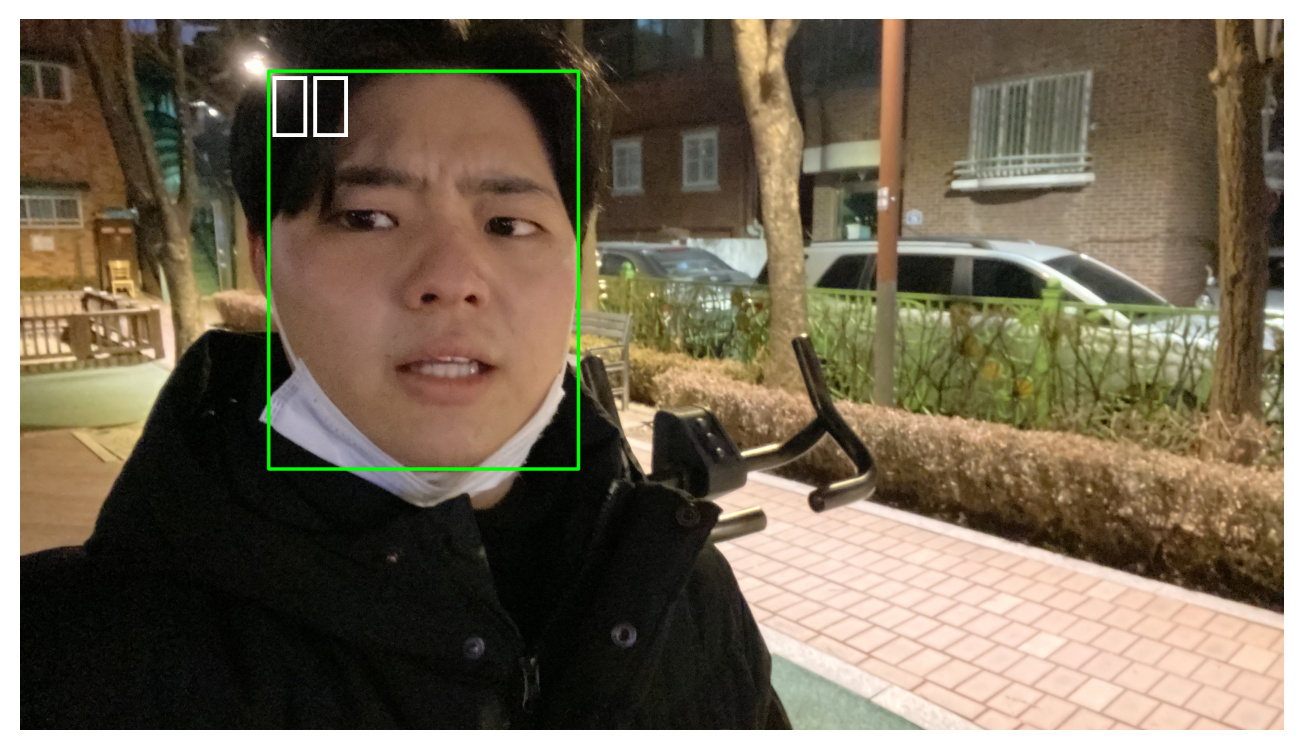

In [ ]:
# 사진 하나와, 상자 쳐서 확인

import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

i = random.randint(1, len(train_datas_paths)-2)

name = all_jasons[i]['filename']
expr = all_jasons[i]['faceExp_uploader']
boxe = all_jasons[i]['annot_A']['boxes']
back = all_jasons[i]['annot_A']['bg']

min_x, min_y, max_x, max_y = [int(value) for value in boxe.values()]
name, expr, min_x, min_y, max_x, max_y, back

for i in train_datas_paths:
    if name in i:
        img_path = i

image = cv2.imread(img_path)

cv2.rectangle(image, (min_x, min_y), (max_x, max_y), (0, 255, 0), 10)
plt.axis('off')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.text(max_x, max_y, expr, color='white', fontsize=25,
         ha='left', va='top')


plt.show()

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 23.0 MB/s eta 0:00:00


In [ ]:
# yolov10 pt 모델 확인하고 어떤 라벨이 있는지 확인하기

from ultralytics.models import YOLO

model = YOLO('models/yolov10n') # 추후 더 많은 라벨의 모델 찾기

result=model.predict(image)
result[0].show()

100%|██████████| 5.59M/5.59M [00:00<00:00, 103MB/s]



0: 384x640 1 person, 1 car, 53.5ms
Speed: 9.6ms preprocess, 53.5ms inference, 83.9ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
objects_form_pic = []
for i in result[0].boxes.cls:
    objects_form_pic.append(result[0].names[int(i)])

In [ ]:
objects_form_pic

['person', 'car']

In [ ]:
# conf score 확인
result[0].boxes.conf

tensor([0.9307, 0.4700], device='cuda:0')

In [ ]:
expr ,back, objects_form_pic

('기쁨', '공공시설/종교/의료', ['person', 'person'])